# Image blending using pyramid

In [290]:
from skimage.io import imread, imshow
from skimage.filters import gaussian
from numpy.fft import fft2, fftshift, ifft2
from skimage import img_as_float, img_as_ubyte, transform
import numpy as np
import matplotlib.pyplot as plt
# from skimage.transform import fftshift
%matplotlib inline

In [291]:
img1 = imread('apple.jpg')
img2 = imread('orange.jpg')
#plt.figure(figsize=(15, 10))
#plt.subplot(221)
#imshow(img1)
#plt.subplot(222)
#imshow(img2)
if img1.shape[0] != img2.shape[0] & img1.shape[1] != img2.shape[1]:
    print('ERROR! Image shapes do not equal')

In [292]:
R1 = img1[:, :, 0]
G1 = img1[:, :, 1]
B1 = img1[:, :, 2]
R2 = img2[:, :, 0]
G2 = img2[:, :, 1]
B2 = img2[:, :, 2]
#np.dstack([R1, G1, B1])

In [293]:
#img1_crop = img1[0:img1.shape[1], 0:img1.shape[0] // 2 + 1]
#img2_crop = img2[0:img2.shape[1], img2.shape[0] // 2 + 1:img2.shape[0]]
#plt.figure(figsize=(15, 10))
#plt.subplot(221)
#imshow(img1_crop)
#plt.subplot(222)
#imshow(img2_crop)

In [362]:
mask = np.zeros((img1.shape[0], img1.shape[1]))
for i in range(0, img1.shape[1]):
    for j in range(0, img1.shape[0] // 2 + 1):
        mask[i, j] = 1
reversed_mask = np.fliplr(mask)
#plt.figure(figsize=(15, 10))
#plt.subplot(221)
#imshow(mask)
#plt.subplot(222)
#imshow(reversed_mask)

In [423]:
#img1_crop = np.zeros((mask.shape[0], mask.shape[1]))
#img2_crop = np.zeros((mask.shape[0], mask.shape[1]))
#for i in range(0, mask.shape[1]):
#    for j in range(0, mask.shape[0]):
#        if mask[i, j] == 0:
#            img1_crop[i, j] = img1[i, j]
#        else:
#            img1_crop[i, j] = 0
#for i in range(0, mask.shape[1]):
#    for j in range(0, mask.shape[0]):
#        if mask[i, j] == 1:
#            img2_crop[i, j] = img2[i, j]
#        else:
#            img2_crop[i, j] = 0
#plt.figure(figsize=(15, 10))
#plt.subplot(221)
#imshow(img1_crop)
#plt.subplot(222)
#imshow(img2_crop)

ValueError: setting an array element with a sequence.

In [364]:
def build_gauss_pyramid(img, sigma, n_layers):
    i1 = fft2(img)
    arr = np.zeros(i1.shape)
    arr[np.int(np.floor(i1.shape[0] // 2)), np.int(np.floor(i1.shape[1] // 2))] = 1
    arr2 = gaussian(arr, sigma = sigma)
    gfilt = fft2(arr2)
    imgs = []
    fouries = []
    imgs.append(img)
    fouries.append(i1)
    for i in range(1, n_layers + 1):
        i1 = abs(gfilt) * i1
        fouries.append(i1)
        imgs.append(abs(ifft2(i1)))
        i = i + 1
    return imgs, fouries

In [365]:
def build_laplas_pyramid(img, sigma, n_layers):
    imgs, fouries = build_gauss_pyramid(img, sigma, n_layers)
    fouries_lap = []
    i2 = fft2(img)
    nex = i2 - fouries[1]
    fouries_lap.append(nex)
    imgs[0] = abs(ifft2(nex))
    for i in range(2, n_layers + 1):
        nex2 = fouries[i - 1] - fouries[i]
        fouries_lap.append(nex2)
        imgs[i] = abs(ifft2(nex2))
    return imgs, fouries_lap

In [366]:
#imgs1_gau, fouries1_gau = build_gauss_pyramid(img1, 3, 5)
#imgs1_lap, fouries1_lap = build_laplas_pyramid(img1, 3, 5)
#tv = fouries1_gau[5] + np.sum(fouries1_lap, axis = 0)
#imm = np.clip(abs(ifft2(tv)), 0, 1)

#for i in range(1, 6): #gauss1
#    plt.figure(figsize=(15, 10))
#    plt.subplot(221)
#    imshow(imgs1_gau[i])
#    plt.subplot(222)
#    imshow(np.log(1 + abs(fftshift(fouries1_gau[i]))), cmap = plt.get_cmap("gray"))

In [367]:
#for i in range(0, 5): #laplas1
#    plt.figure(figsize=(15, 10))
#    plt.subplot(221)
#    imshow(imgs1_lap[i])
#    plt.subplot(222)
#    imshow(np.log(1 + abs(fftshift(fouries1_lap[i]))), cmap = plt.get_cmap("gray"))

In [368]:
#imshow(imm - img1)

In [369]:
#imgs2_gau, fouries2_gau = build_gauss_pyramid(img2, 3, 5)
#imgs2_lap, fouries2_lap = build_laplas_pyramid(img2, 3, 5)
#tv = fouries2_gau[5] + np.sum(fouries2_lap, axis = 0)
#imm = np.clip(abs(ifft2(tv)), 0, 1)

#for i in range(1, 6): #gauss2
#    plt.figure(figsize=(15, 10))
#    plt.subplot(221)
#    imshow(imgs2_gau[i])
#    plt.subplot(222)
#    imshow(np.log(1 + abs(fftshift(fouries2_gau[i]))), cmap = plt.get_cmap("gray"))

In [370]:
#for i in range(0, 5): #laplas2
#    plt.figure(figsize=(15, 10))
#    plt.subplot(221)
#    imshow(imgs2_lap[i])
#    plt.subplot(222)
#    imshow(np.log(1 + abs(fftshift(fouries2_lap[i]))), cmap = plt.get_cmap("gray"))

In [371]:
#imshow(imm - img2)

In [405]:
layers = 2
sigma = 3
imgsm1_gau, fouriesm1_gau = build_gauss_pyramid(mask, sigma, layers)
imgsm2_gau, fouriesm2_gau = build_gauss_pyramid(reversed_mask, sigma, layers)

#for i in range(1, 6): #gauss1
#    plt.figure(figsize=(15, 10))
#    plt.subplot(221)
#    imshow(imgsm1_gau[i])
#    plt.subplot(222)
#    imshow(np.log(1 + abs(fftshift(fouriesm1_gau[i]))), cmap = plt.get_cmap("gray"))

In [406]:
#for i in range(1, 6): #gauss2
#    plt.figure(figsize=(15, 10))
#    plt.subplot(221)
#    imshow(imgsm2_gau[i])
#    plt.subplot(222)
#    imshow(np.log(1 + abs(fftshift(fouriesm2_gau[i]))), cmap = plt.get_cmap("gray"))

In [412]:
R1_gau, R1f_gau = build_gauss_pyramid(R1, sigma, layers)
R1_lap, R1f_lap = build_laplas_pyramid(R1, sigma, layers)

G1_gau, G1f_gau = build_gauss_pyramid(G1, sigma, layers)
G1_lap, G1f_lap = build_laplas_pyramid(G1, sigma, layers)

B1_gau, B1f_gau = build_gauss_pyramid(B1, sigma, layers)
B1_lap, B1f_lap = build_laplas_pyramid(B1, sigma, layers)

R2_gau, R2f_gau = build_gauss_pyramid(R2, sigma, layers)
R2_lap, R2f_lap = build_laplas_pyramid(R2, sigma, layers)

G2_gau, G2f_gau = build_gauss_pyramid(G2, sigma, layers)
G2_lap, G2f_lap = build_laplas_pyramid(G2, sigma, layers)

B2_gau, B2f_gau = build_gauss_pyramid(B2, sigma, layers)
B2_lap, B2f_lap = build_laplas_pyramid(B2, sigma, layers)

R_blend = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
G_blend = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
B_blend = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Rf_blend = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Gf_blend = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bf_blend = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(0, layers):
    R_blend[i] = (R1_lap[i] * imgsm1_gau[i]) + (R2_lap[i] * imgsm2_gau[i])
    G_blend[i] = (G1_lap[i] * imgsm1_gau[i]) + (G2_lap[i] * imgsm2_gau[i])
    B_blend[i] = (B1_lap[i] * imgsm1_gau[i]) + (B2_lap[i] * imgsm2_gau[i])
    
for i in range(0, layers):
    Rf_blend[i] = (R1f_lap[i] * fouriesm1_gau[i]) + (R2f_lap[i] * fouriesm2_gau[i])
    Gf_blend[i] = (G1f_lap[i] * fouriesm1_gau[i]) + (G2f_lap[i] * fouriesm2_gau[i])
    Bf_blend[i] = (B1f_lap[i] * fouriesm1_gau[i]) + (B2f_lap[i] * fouriesm2_gau[i])


In [413]:
#imgs_blend = [0, 0, 0, 0, 0, 0]
#fouries_blend = [0, 0, 0, 0, 0, 0]
#for i in range(0, 5):
#    imgs_blend[i] = (imgs1_lap[i] * imgsm1_gau[i]) + (imgs2_lap[i] * imgsm2_gau[i])
#    fouries_blend[i] = (fouries1_lap[i] * fouriesm1_gau[i]) + (fouries2_lap[i] * fouriesm2_gau[i])

In [422]:
#img_combine = np.zeros((mask.shape[0], mask.shape[1]))
#for i in range(0, mask.shape[1]):
#    for j in range(0, mask.shape[0]):
#        if mask[i, j] == 0:
#            img_combine[i, j] = img1_crop[i, j]
#        else:
#            img_combine[i, j] = img2_crop[i, j]
#imshow(img_combine)
#img_combine.shape

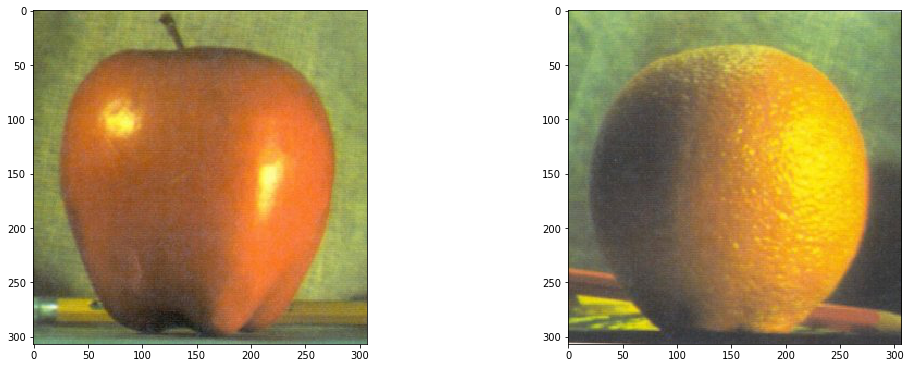

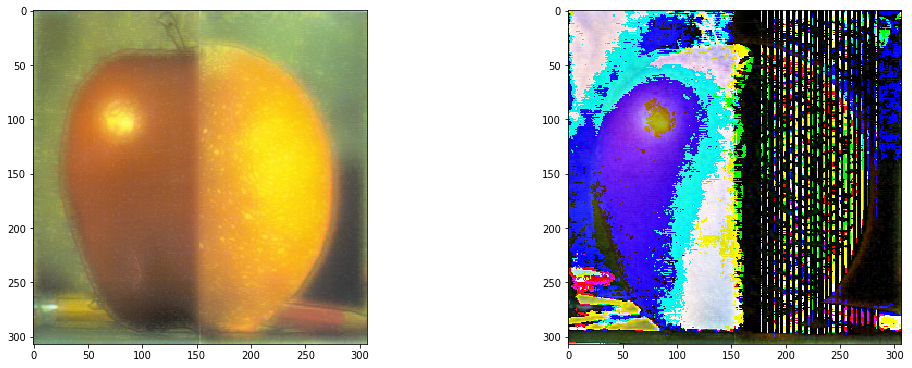

In [425]:
#tv = np.sum(fouries_blend, axis=0)
#imm = np.clip(abs(ifft2(tv)), 0, 1)

RB = np.sum(R_blend, axis=0)
GB = np.sum(G_blend, axis=0)
BB = np.sum(B_blend, axis=0)

RBf = np.sum(Rf_blend, axis=0)
GBf = np.sum(Gf_blend, axis=0)
BBf = np.sum(Bf_blend, axis=0)

RB[RB < 0] = 0
RB[RB > 255] = 255
RB = RB.astype(np.uint8)
 
GB[GB < 0] = 0
GB[GB > 255] = 255
GB = GB.astype(np.uint8)
 
BB[BB < 0] = 0
BB[BB > 255] = 255
BB = BB.astype(np.uint8)

RGB_blend = np.dstack([RB, GB, BB])
RGBf_blend = np.dstack([RBf, GBf, BBf])
imm = np.clip(abs(ifft2(RGBf_blend)), 0, 1)
#RGB_blend = np.clip(RGB_blend, 0, 1)
#RGB_blend = RGB_blend.astype('uint8')
#RGB_blend = img_as_ubyte(RGB_blend)

plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(img1)
plt.subplot(222)
imshow(img2)

plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(RGB_blend)
plt.subplot(222)
imshow(RGB_blend - img2)